Distribuição Lei de Potência

Calculating best minimal value for power law fit
alpha estimado: 2.1353899540319166
xmin estimado: 22151.0


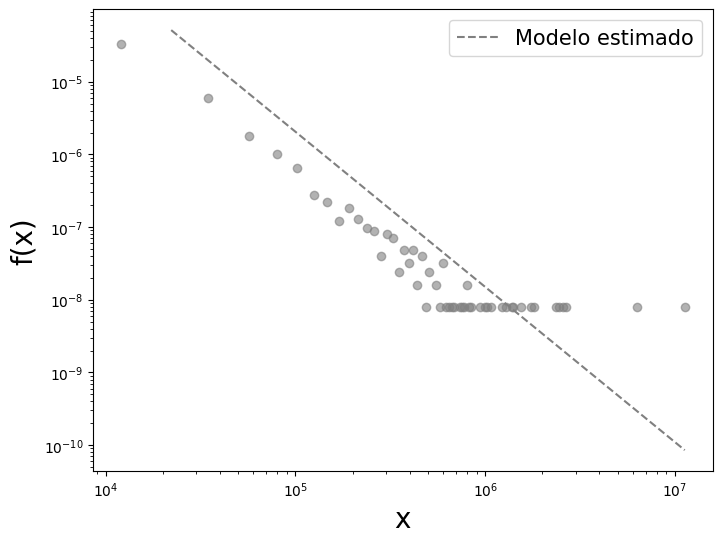

In [1]:
import powerlaw
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(101)

cities = pd.read_csv('data/BRAZIL_CITIES_REV2022.csv', header=(0))
cities = cities.dropna(axis='rows') #remove NaN
data = cities['IBGE_RES_POP']
data = np.array(data)
index = np.where(data <= 0)
data = np.delete(data, index)
n = len(data)

results = powerlaw.Fit(data)
xmin = results.power_law.xmin
alpha_hat = results.power_law.alpha
print('alpha estimado:', alpha_hat)
print('xmin estimado:', xmin)

## mostra a distribuição dos dados gerados
fig = plt.figure(figsize =(8, 6))
nb = 500 # número de bins
p, bins = np.histogram(data, bins = nb, density=True)
bins_mean = [0.5 * (bins[i] + bins[i+1]) 
             for i in range(len(p))]
plt.loglog(bins_mean, p, 'o',
           color = 'gray', alpha=0.6, linewidth=1)

# modelo estimado
y = np.linspace(xmin, np.max(data), 100)
f_hat = (alpha_hat-1)*xmin**(alpha_hat-1)*y**(-alpha_hat)
plt.plot(y,f_hat,'--', color = 'gray', 
         label = 'Modelo estimado')
plt.xlabel('x', fontsize = 20)
plt.ylabel('f(x)',fontsize = 20)
plt.legend(fontsize = 15)
#plt.savefig('MC-power-law-ML.svg')
plt.show(True)

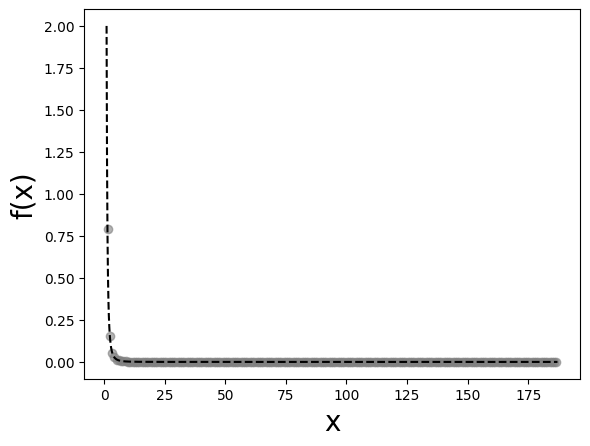

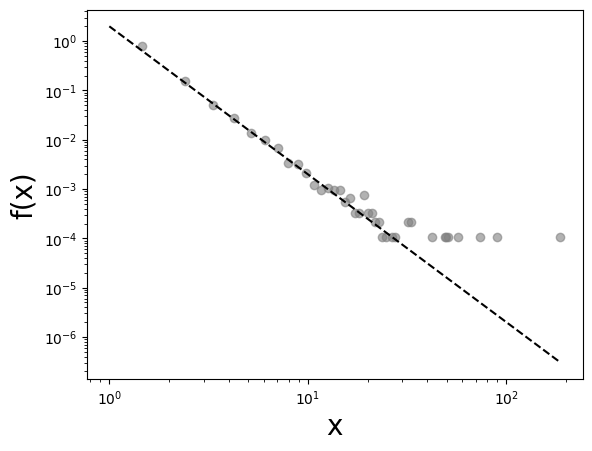

In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(999)

alpha = 3 # parâmetro do modelo lei de potência
xmin = 1 # valor mínimo para o qual a lei é observada
n = 10000 # número de valores gerados
data = [] # lista que armazena os valores
for i in range(0,n):
    # usa o método da transformada inversa
    u = np.random.uniform(0,1)
    x = xmin*(1 - u)**(-1/(alpha-1))
    data.append(x)

## mostra a distribuição dos dados gerados
nb = 200 # número de bins
p, bins = np.histogram(data, bins = nb, density=True)
bins_mean = [0.5 * (bins[i] + bins[i+1]) for i in range(len(p))]
plt.plot(bins_mean, p, 'o', color = 'gray', 
         alpha=0.6, linewidth=1)

# mostra a curva teórica
y = np.linspace(1, np.max(data), 1000)
f = ((alpha-1)/xmin)*(y/xmin)**(-alpha)
plt.plot(y,f,'--', color = 'black')
plt.xlabel('x', fontsize = 20)
plt.ylabel('f(x)',fontsize = 20)
plt.show(True)

#escala log-log
## mostra a distribuição dos dados gerados
nb = 200 # número de bins
p, bins = np.histogram(data, bins = nb, density=True)
bins_mean = [0.5 * (bins[i] + bins[i+1]) for i in range(len(p))]
plt.loglog(bins_mean, p, 'o', color = 'gray', 
           alpha=0.6, linewidth=1)

# mostra a curva teórica
y = np.linspace(1, np.max(data), 100)
f = ((alpha-1)/xmin)*(y/xmin)**(-alpha)
plt.plot(y,f,'--', color = 'black')
plt.xlabel('x', fontsize = 20)
plt.ylabel('f(x)',fontsize = 20)
plt.savefig('MC-power.svg')
plt.show(True)

Distribuição acumulada complementar

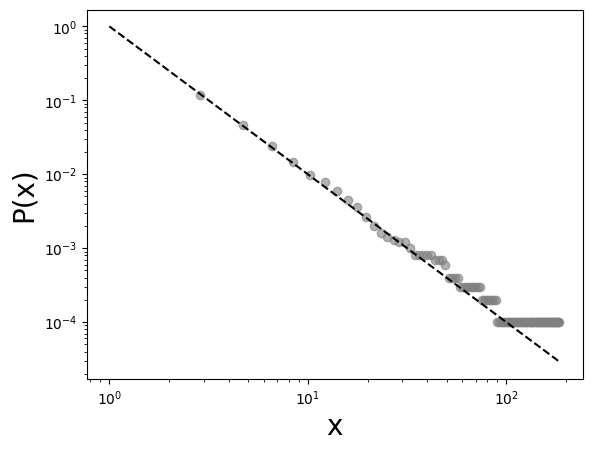

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# getting data of the histogram
count, bins_count = np.histogram(data, bins=100)
  
# finding the PDF of the histogram using count values
pdf = count/sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = 1 - np.cumsum(pdf)
  
# plotting PDF and CDF
#plt.plot(bins_count[1:], pdf, 'o', color="red", label="PDF")
plt.loglog(bins_count[1:-1], cdf[0:-1], 'o', label="CDF", color = 'gray', 
           alpha=0.6, linewidth=1)
# mostra a curva teórica
y = np.linspace(1, np.max(data), 100)
f = (y/xmin)**(-alpha + 1)
plt.plot(y,f,'--', color = 'black')
plt.xlabel('x', fontsize = 20)
plt.ylabel('P(x)',fontsize = 20)
plt.savefig('MC-power-acum.svg')
plt.show(True)

In [4]:
s = 0
for i in range(0,n):
    s += np.log(data[i]/xmin)
alpha_hat = 1 + n/s
print('Alpha:', alpha)
print('Valor estimado de alpha:', alpha_hat)

Alpha: 3
Valor estimado de alpha: 3.0122244295670186


alpha_hat: 2.5424070188346413


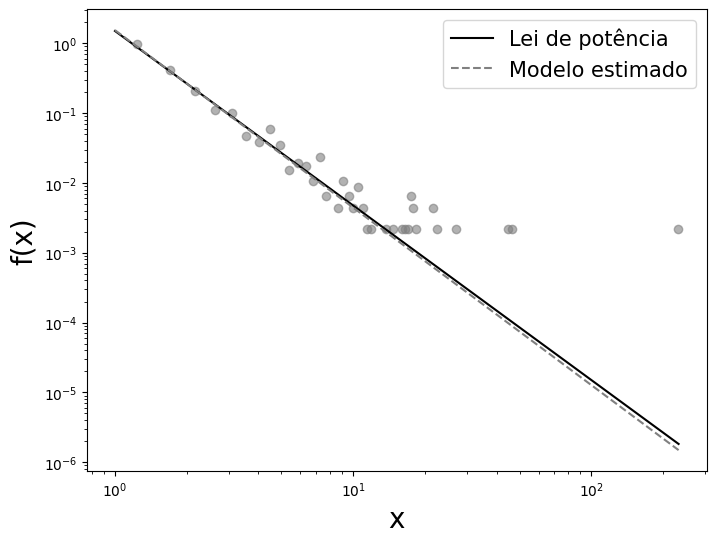

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(42)

alpha = 2.5 # parâmetro do modelo lei de potência
xmin = 1 # valor mínimo para o qual a lei é observada
n = 1000 # número de valores gerados
data = [] # lista que armazena os valores
# gera a amostra
for i in range(0,n):
    # usa o método da transformada inversa
    u = np.random.uniform(0,1)
    x = xmin*(1 - u)**(-1/(alpha-1))
    data.append(x)

## mostra a distribuição dos dados gerados
fig = plt.figure(figsize =(8, 6))
nb = 500 # número de bins
p, bins = np.histogram(data, bins = nb, density=True)
bins_mean = [0.5 * (bins[i] + bins[i+1]) 
             for i in range(len(p))]
plt.loglog(bins_mean, p, 'o',
           color = 'gray', alpha=0.6, linewidth=1)

# mostra a curva teórica
y = np.linspace(1, np.max(data), 100)
f = ((alpha-1)/xmin)*(y/xmin)**(-alpha)
plt.plot(y,f,'-', color = 'black', 
         label = 'Lei de potência')

# estimação de máxima verossimilhança
s = 0
for i in range(0,n):
    s += np.log(data[i]/xmin)
alpha_hat = 1 + n/s
print('alpha_hat:', alpha_hat)
# modelo estimado
f_hat = ((alpha_hat-1)/xmin)*(y/xmin)**(-alpha_hat)
plt.plot(y,f_hat,'--', color = 'gray', 
         label = 'Modelo estimado')
plt.xlabel('x', fontsize = 20)
plt.ylabel('f(x)',fontsize = 20)
plt.legend(fontsize = 15)
plt.savefig('MC-power-law-ML.svg')
plt.show(True)